# $$ Stock \ Prize \ Prediction $$

### Business Understanding
The art of forecasting stock prices has been a difficult task for many of the researchers and analysts. In fact, investors are highly interested in the research area of stock price prediction. For a good and successful investment, many investors are keen on knowing the future situation of the stock market. Good and effective prediction systems for the stock market help traders, investors, and analyst by providing supportive information like the future direction of the stock market.

In [63]:
# Import the required Libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

## $$ Load \ the \ Data $$

In [15]:
df = pd.read_excel(r'Minor Project Data set (Stock Price Prediction).xlsx')

In [16]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


## $$ Data \ Description $$

Below is the description of the features in the stock prediction dataset:

| Feature | Description |
| :---: | :--- | 
| **Date** | Date of the trading day |
| **Open** | Opening price of the stock |
| **High** | Highest price of the stock during the trading day  |
| **Low** | Lowest price of the stock during the trading day  |
| **Close** | Closing price of the stock  |
| **Adj Close** | Adjusted closing price of the stock  |
| **Volume** | Number of shares traded during the trading day |


## $$ Exploratory \ Data \ Analysis $$

In [17]:
def Understanding_data(data):
    shape = data.shape
    columns = data.columns
    naVal = data.isna().sum()
    print(f'Shape   : {shape}')
    print('**'*40)
    print(f'columns : {columns}')
    print('**'*40)
    print(f'NaVal  : \n{naVal}')
    print('**'*40)
    data.info()

In [18]:
Understanding_data(df)

Shape   : (1009, 7)
********************************************************************************
columns : Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
********************************************************************************
NaVal  : 
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null 

<Axes: >

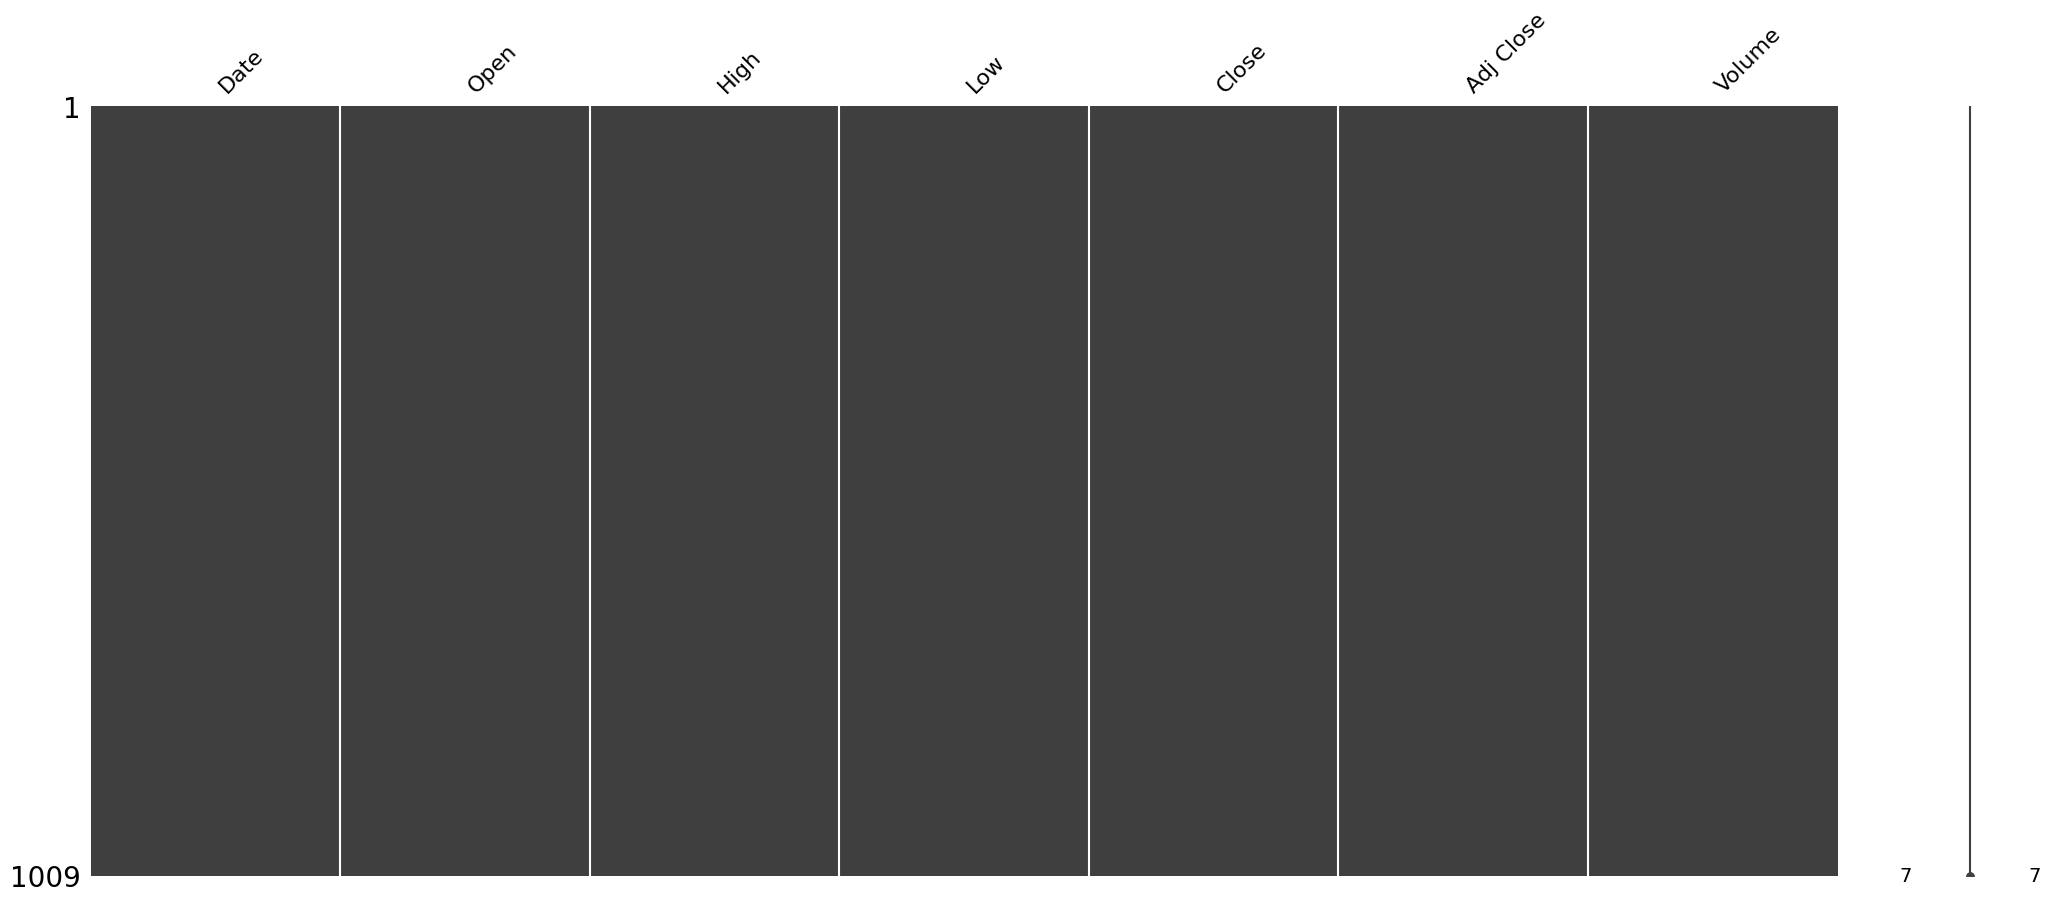

In [19]:
msno.matrix(df)

- From Above Missingno plot we clearly say that there is no mising values in our DataSet

In [20]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,1009,2020-02-05 07:30:58.870168320,2018-02-05 00:00:00,2019-02-06 00:00:00,2020-02-06 00:00:00,2021-02-05 00:00:00,2022-02-04 00:00:00,NaN
Open,1009.0,419.059673,233.919998,331.48999,377.769989,509.130005,692.349976,108.537532
High,1009.0,425.320703,250.649994,336.299988,383.01001,515.630005,700.98999,109.26296
Low,1009.0,412.374044,231.229996,326.0,370.880005,502.529999,686.090027,107.555867
Close,1009.0,419.000733,233.880005,331.619995,378.670013,509.079987,691.690002,108.289999
Adj Close,1009.0,419.000733,233.880005,331.619995,378.670013,509.079987,691.690002,108.289999
Volume,1009.0,7570685.034688,1144000.0,4091900.0,5934500.0,9322400.0,58904300.0,5465535.22569


- 1.The dataset contains stock market data spanning from February 5, 2018, to February 4, 2022, with a total of 1009 observations

- 2.On average, the opening price of the stocks is approximately &#36;419.06, while the closing price and adjusted closing price are also close to this value.




- 3.The volume of shares traded ranges from approximately 1.14 million to 58.90 million, indicating varying levels of market activity over the observed period. Additionally, the high standard deviation for volume suggests significant fluctuations in trading activity.





In [21]:
# Data Exploration
numerical_features = df.select_dtypes(include=['number']).columns
date_feature = ['Date']
print(f'Numerical Features : {numerical_features}\nDate Feature : {date_feature}')

Numerical Features : Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Date Feature : ['Date']


In [22]:
def num_univarient(num_data):
    for clm in num_data:
        print('-'*10,clm,'-'*10)
        print(df[clm].agg(['min','max','mean','std','skew','kurt']),'\n')
#         print('***'*15,'\n')

In [23]:
num_univarient(numerical_features)

---------- Open ----------
min     233.919998
max     692.349976
mean    419.059673
std     108.537532
skew      0.463163
kurt     -0.851395
Name: Open, dtype: float64 

---------- High ----------
min     250.649994
max     700.989990
mean    425.320703
std     109.262960
skew      0.461597
kurt     -0.870562
Name: High, dtype: float64 

---------- Low ----------
min     231.229996
max     686.090027
mean    412.374044
std     107.555867
skew      0.459446
kurt     -0.853267
Name: Low, dtype: float64 

---------- Close ----------
min     233.880005
max     691.690002
mean    419.000733
std     108.289999
skew      0.457879
kurt     -0.866028
Name: Close, dtype: float64 

---------- Adj Close ----------
min     233.880005
max     691.690002
mean    419.000733
std     108.289999
skew      0.457879
kurt     -0.866028
Name: Adj Close, dtype: float64 

---------- Volume ----------
min     1.144000e+06
max     5.890430e+07
mean    7.570685e+06
std     5.465535e+06
skew    2.995972e+00
kurt  

In [24]:
def calculate_missing_outliers(df):
    df_numeric = df.select_dtypes(include=['number'])
    total_per_mv = ((df.isnull().sum().sum() / df.size) * 100).round(2)
    
    outliers_summary = pd.DataFrame(columns=['Outliers', '% Outliers'])
    for col in numerical_features:
        Q1 = df_numeric[col].quantile(0.25)
        Q3 = df_numeric[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = ((df_numeric[col] < lower_bound) | (df_numeric[col] > upper_bound)).sum()
        percentage_outliers = (outliers / len(df_numeric) * 100).round(2)
        
        outliers_summary.loc[col] = [outliers, percentage_outliers]

    outliers_summary_sorted = outliers_summary.sort_values(by='% Outliers', ascending=False)
    
    print(f"The total percentage of missing values in numeric columns is: {total_per_mv}%\n")
    
    print("Summary Table for Outliers in Numeric Columns:")
    print(outliers_summary_sorted)

In [25]:
calculate_missing_outliers(df)

The total percentage of missing values in numeric columns is: 0.0%

Summary Table for Outliers in Numeric Columns:
           Outliers  % Outliers
Volume         57.0        5.65
Open            0.0        0.00
High            0.0        0.00
Low             0.0        0.00
Close           0.0        0.00
Adj Close       0.0        0.00


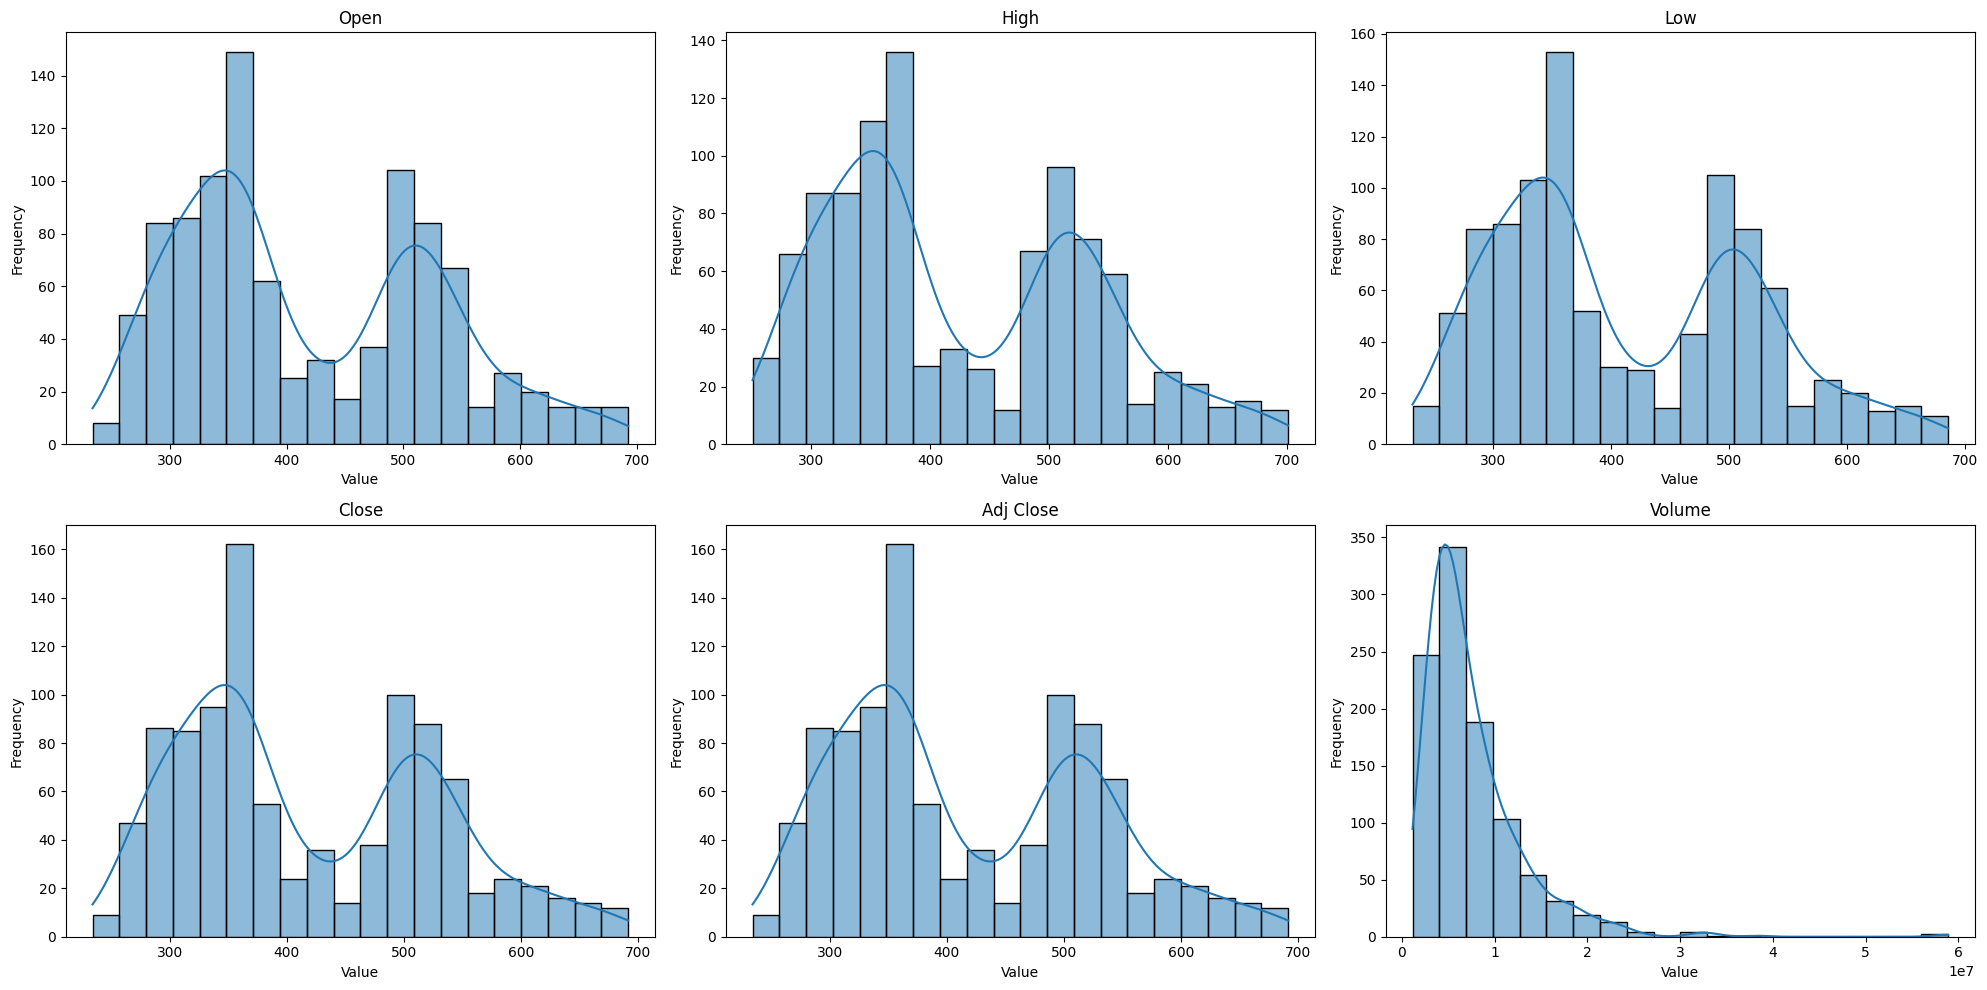

In [26]:
num_rows = (len(numerical_features) - 1) // 3 + 1
num_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numerical column
for i, column in enumerate(numerical_features):
    ax = axes[i]
    sns.histplot(df[column], bins=20, edgecolor='black', kde=True, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Remove any empty subplots
for i in range(len(numerical_features), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


**1.Open, High, Low, Close, and Adj Close Columns:**
- These columns (related to stock prices) exhibit similar patterns in their distributions:
    * **Bimodal Distribution:** Each histogram shows two prominent peaks, indicating two groups of data points.
    * Most data values cluster around specific ranges.
    * No apparent presence of outliers is visible in these visualizations.
   
**2.Volume Column:**
- The Volume histogram has a different pattern:
    - **Right-Skewed Distribution:** Most trading volumes are concentrated on the lower side, with few instances of very high trading volumes.
    

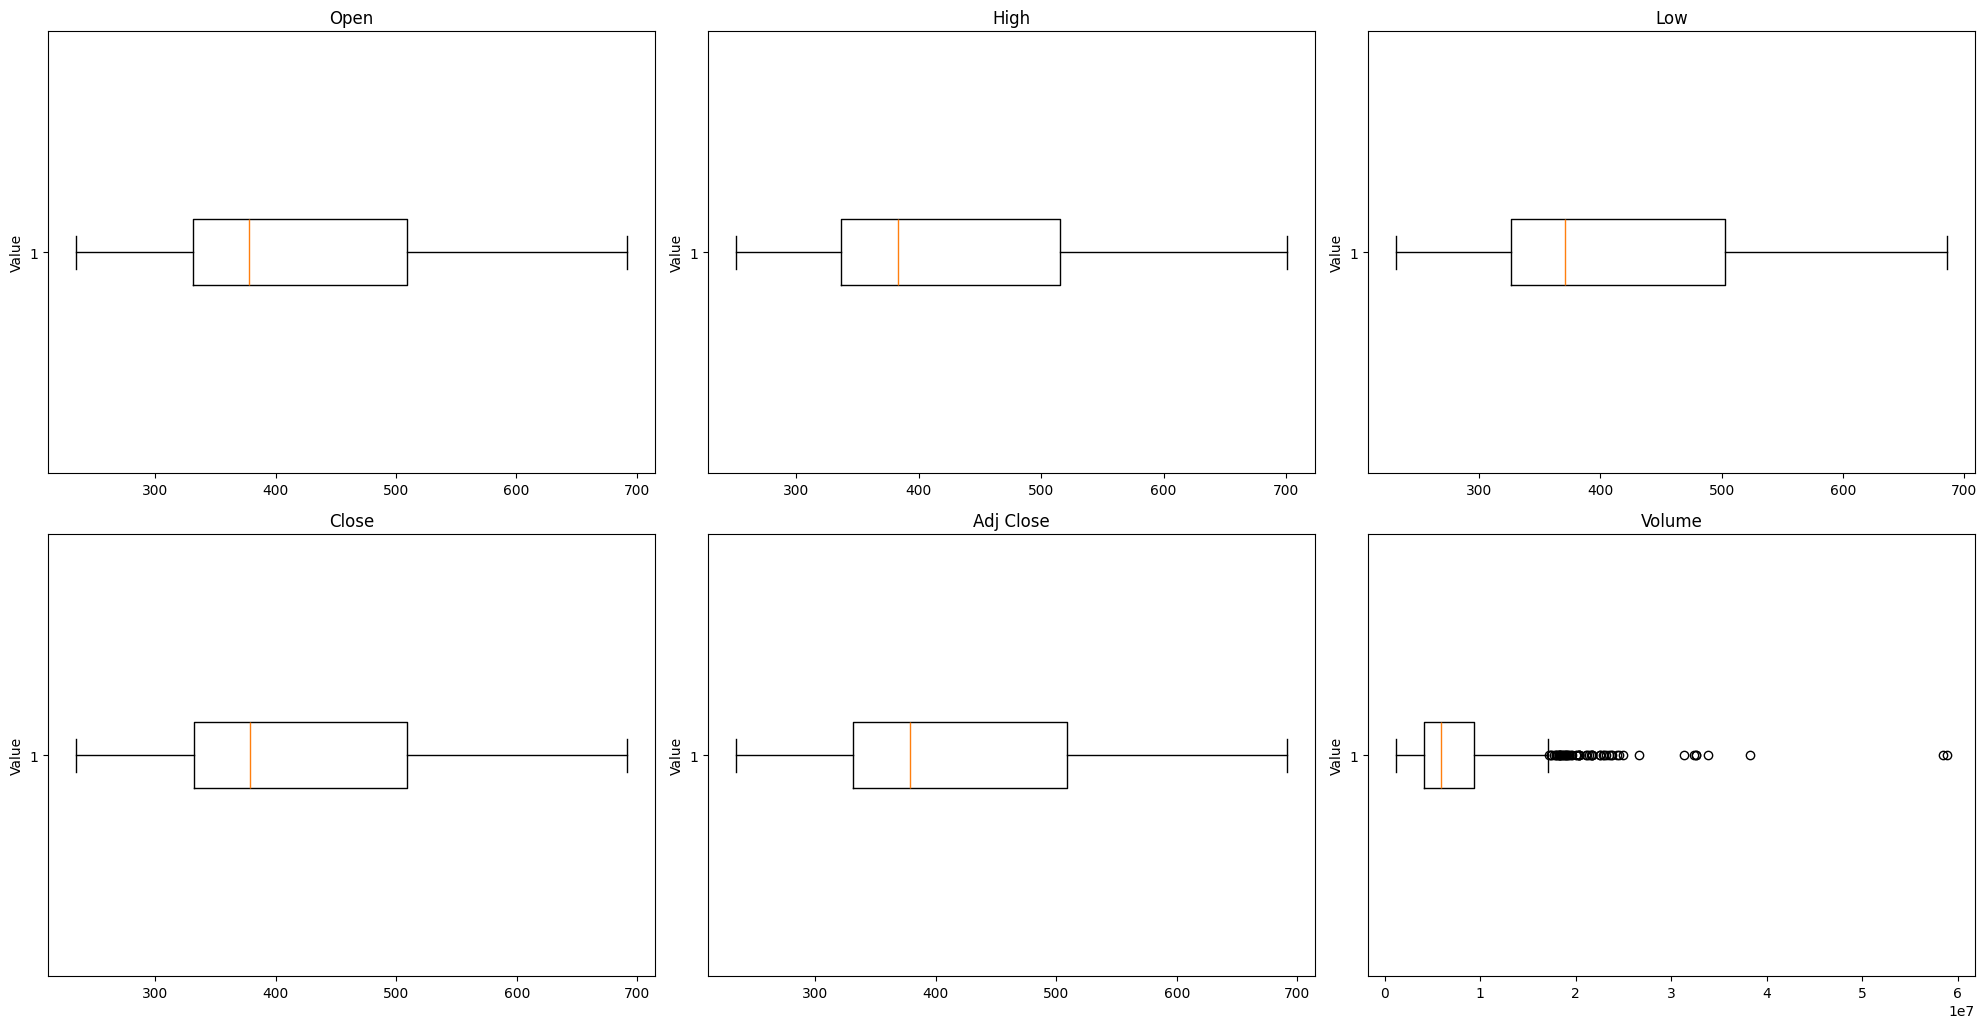

In [27]:
num_rows = (len(numerical_features) - 1) // 2 + 1
num_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Plot box plots for each numerical column
for i, column in enumerate(numerical_features):
    ax = axes[i // num_cols, i % num_cols]
    ax.boxplot(df[column], vert=False)  # Set vert to True for vertical box plot
    ax.set_title(column)
    ax.set_ylabel('Value')

# Remove any empty subplots
for i in range(len(numerical_features), num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


- Common Patterns (Open, High, Low, Close, and Adj Close):These five features exhibit similar patterns in their distributions
- Volume Feature:The Volume feature has a different scale and distribution:
    - **Right-Skewed Distribution:** Most trading volumes are concentrated on the lower side.

<Axes: xlabel='Volume', ylabel='Density'>

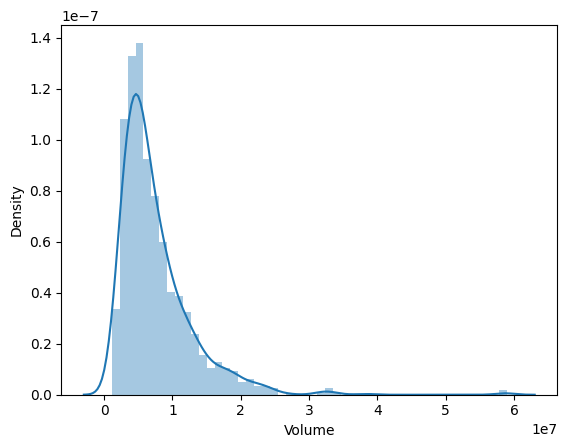

In [28]:
sns.distplot(df['Volume'])

- From the KDE plot above, it is evident that the distribution does not resemble a normal distribution; instead, it exhibits a pronounced right-skewed tail, we may have outliers on the data

In [29]:
def datapointInRange(df,column,thres=4000000):
    count_row = []
    for i in range(1,16):
        num_rows = df[df[column]<=thres*i].shape[0]
        count_row.append(num_rows)
        print(f'Count of rows where Salary is less than or equal to {thres*i} : {num_rows}')

In [30]:
datapointInRange(df,'Volume')

Count of rows where Salary is less than or equal to 4000000 : 243
Count of rows where Salary is less than or equal to 8000000 : 678
Count of rows where Salary is less than or equal to 12000000 : 861
Count of rows where Salary is less than or equal to 16000000 : 936
Count of rows where Salary is less than or equal to 20000000 : 976
Count of rows where Salary is less than or equal to 24000000 : 997
Count of rows where Salary is less than or equal to 28000000 : 1001
Count of rows where Salary is less than or equal to 32000000 : 1002
Count of rows where Salary is less than or equal to 36000000 : 1006
Count of rows where Salary is less than or equal to 40000000 : 1007
Count of rows where Salary is less than or equal to 44000000 : 1007
Count of rows where Salary is less than or equal to 48000000 : 1007
Count of rows where Salary is less than or equal to 52000000 : 1007
Count of rows where Salary is less than or equal to 56000000 : 1007
Count of rows where Salary is less than or equal to 6000

In [31]:
per_95 = df['Volume'].quantile(0.95)
per_75 = df['Volume'].quantile(0.75)
print(f'per_95 : {per_95} \nper_75 : {per_75}')

per_95 : 18009019.99999999 
per_75 : 9322400.0


In [32]:
df[df['Volume'] > per_95].shape , df[df['Volume'] > per_75].shape

((51, 7), (252, 7))

In [33]:
val = df[df['Volume'] > 18009019.99999999].index
df.drop(val,inplace=True)
df.shape

(958, 7)

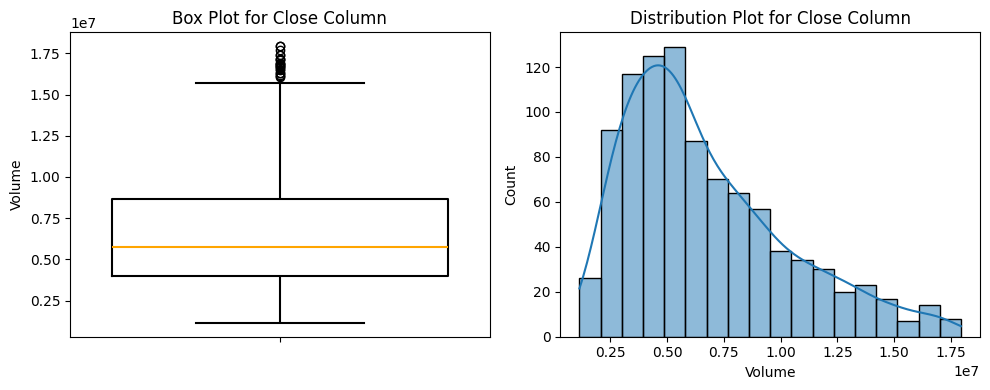

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Box plot for 'Close' column
sns.boxplot(data=df, y='Volume',vert=True,ax=axes[0],fill=False, color='black', medianprops=dict(color='orange'))
axes[0].set_title('Box Plot for Close Column')

# Distribution plot for 'Close' column
sns.histplot(data=df, x='Volume', kde=True, ax=axes[1])
axes[1].set_title('Distribution Plot for Close Column')

plt.tight_layout()
plt.show()


- After removing extreme outliers from the 'Volume' column, the dataset has been effectively cleaned, resulting in a more reliable representation of the trading volume data with approximately 958 rows.

- By removing outliers up to the 75th percentile, around 252 rows have been removed, ensuring that extreme values are addressed without significantly diminishing the dataset's size, maintaining its integrity for further analysis.

In [35]:
df['Year'] = df['Date'].dt.year.astype(int)
df_yearly = df.groupby('Year').mean()
data_point_yearWise = df.groupby(df['Year'])['Date'].count()
print(data_point_yearWise)

Year
2018    205
2019    240
2020    244
2021    250
2022     19
Name: Date, dtype: int64


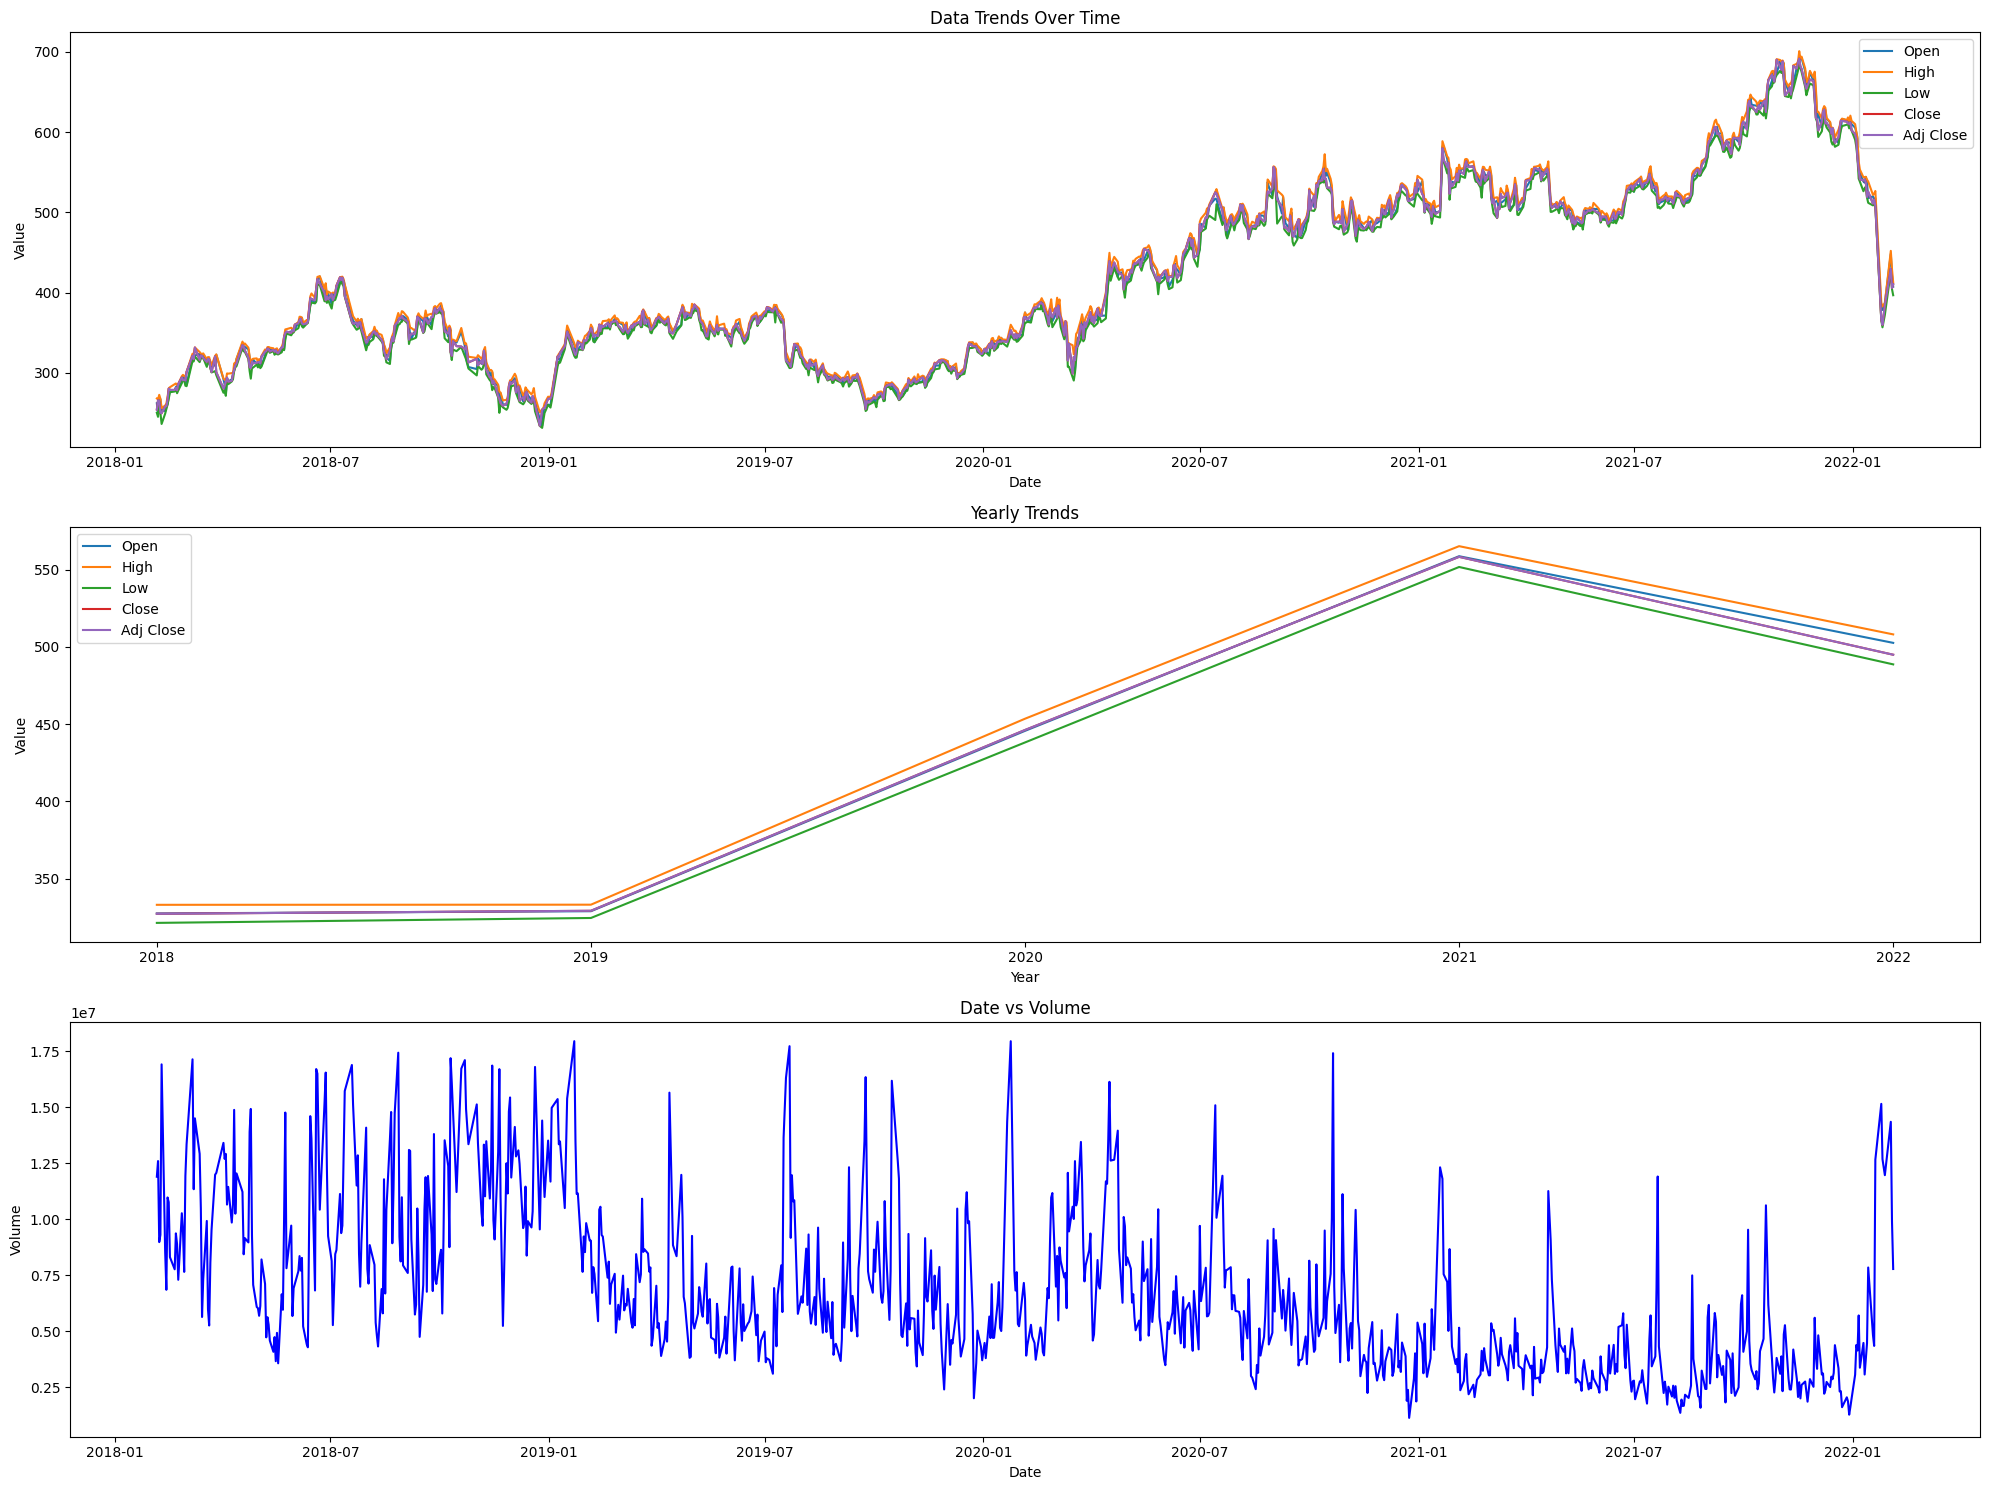

In [36]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 15))

# Plotting all columns except the 'Date' and 'Volume' columns in the first subplot
axes[0].set_title('Data Trends Over Time')
for column in df.columns:
    if column not in ['Date', 'Volume', 'Year']:
        axes[0].plot(df['Date'], df[column], label=column)

axes[0].set_xlabel('Date')
axes[0].set_ylabel('Value')
axes[0].legend()

axes[1].set_title('Yearly Trends')
for column in df_yearly.columns:
    if column not in ['Date', 'Volume']:
        axes[1].plot(df_yearly.index, df_yearly[column], label=column)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Value')
axes[1].set_xticks(df_yearly.index)  # Set the x-axis ticks to be the years
axes[1].legend()

# Plotting date vs volume in the third subplot
axes[2].plot(df['Date'], df['Volume'], color='blue')
axes[2].set_title('Date vs Volume')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Volume')


plt.tight_layout()
plt.show()


**1.Yearly Trends in Stock Metrics:**
- The average values of 'Open', 'High', 'Low', 'Close', and 'Adj Close' exhibit distinct trends over the years.
- In 2018, 2019, and 2020, there are consistent increases in the average values of these metrics, indicating potential growth or positive performance in those years.
- The limited data points for 2022 may lead to increased uncertainty or variability in the calculated average values of stock metrics for that year, potentially affecting the reliability of trend analysis and conclusions drawn from the data.
- Trend analysis based on a smaller sample size in 2022 may be less representative of the overall market dynamics, highlighting the importance of considering data availability when interpreting yearly trends.

**2.Volume Fluctuations:**

- The volume of trading stocks shows fluctuations across the years, with varying levels of trading activity.
- In 2018, the average volume is relatively high at 10.21 million, indicating significant trading activity.
- The average volume decreases gradually in the following years, reaching its lowest point in 2021 at 3.72 million, before slightly increasing again in 2022.

**3.Impact of Data Points:**

- The number of data points available for the year 2022 is significantly lower (19 data points) compared to the other years in the dataset.
- This disparity in data points for 2022 compared to the relatively higher number of data points for the preceding years (ranging from 205 to 250) may introduce bias or skewness in the analysis of yearly trends.

<Axes: >

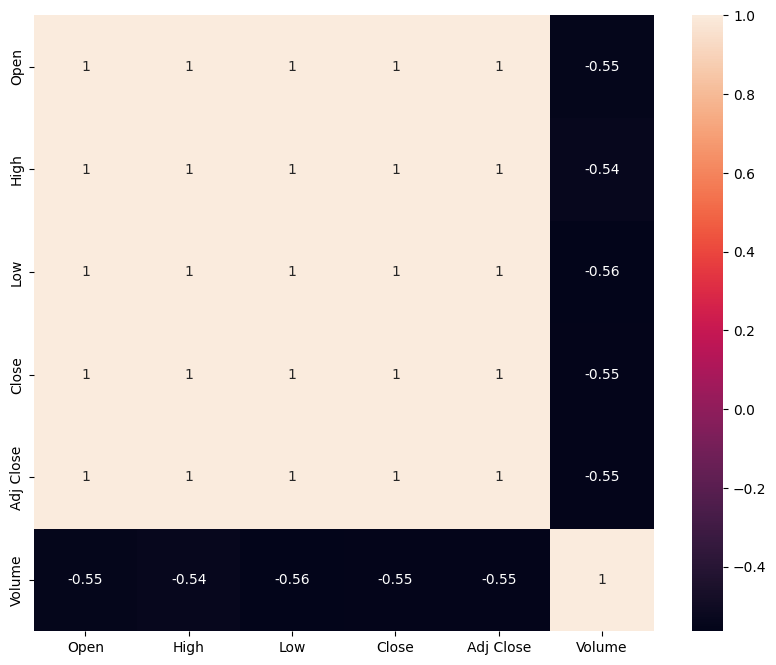

In [37]:
plt.figure(figsize=(10,8)) 
sns.heatmap(df[numerical_features].corr(),annot=True)

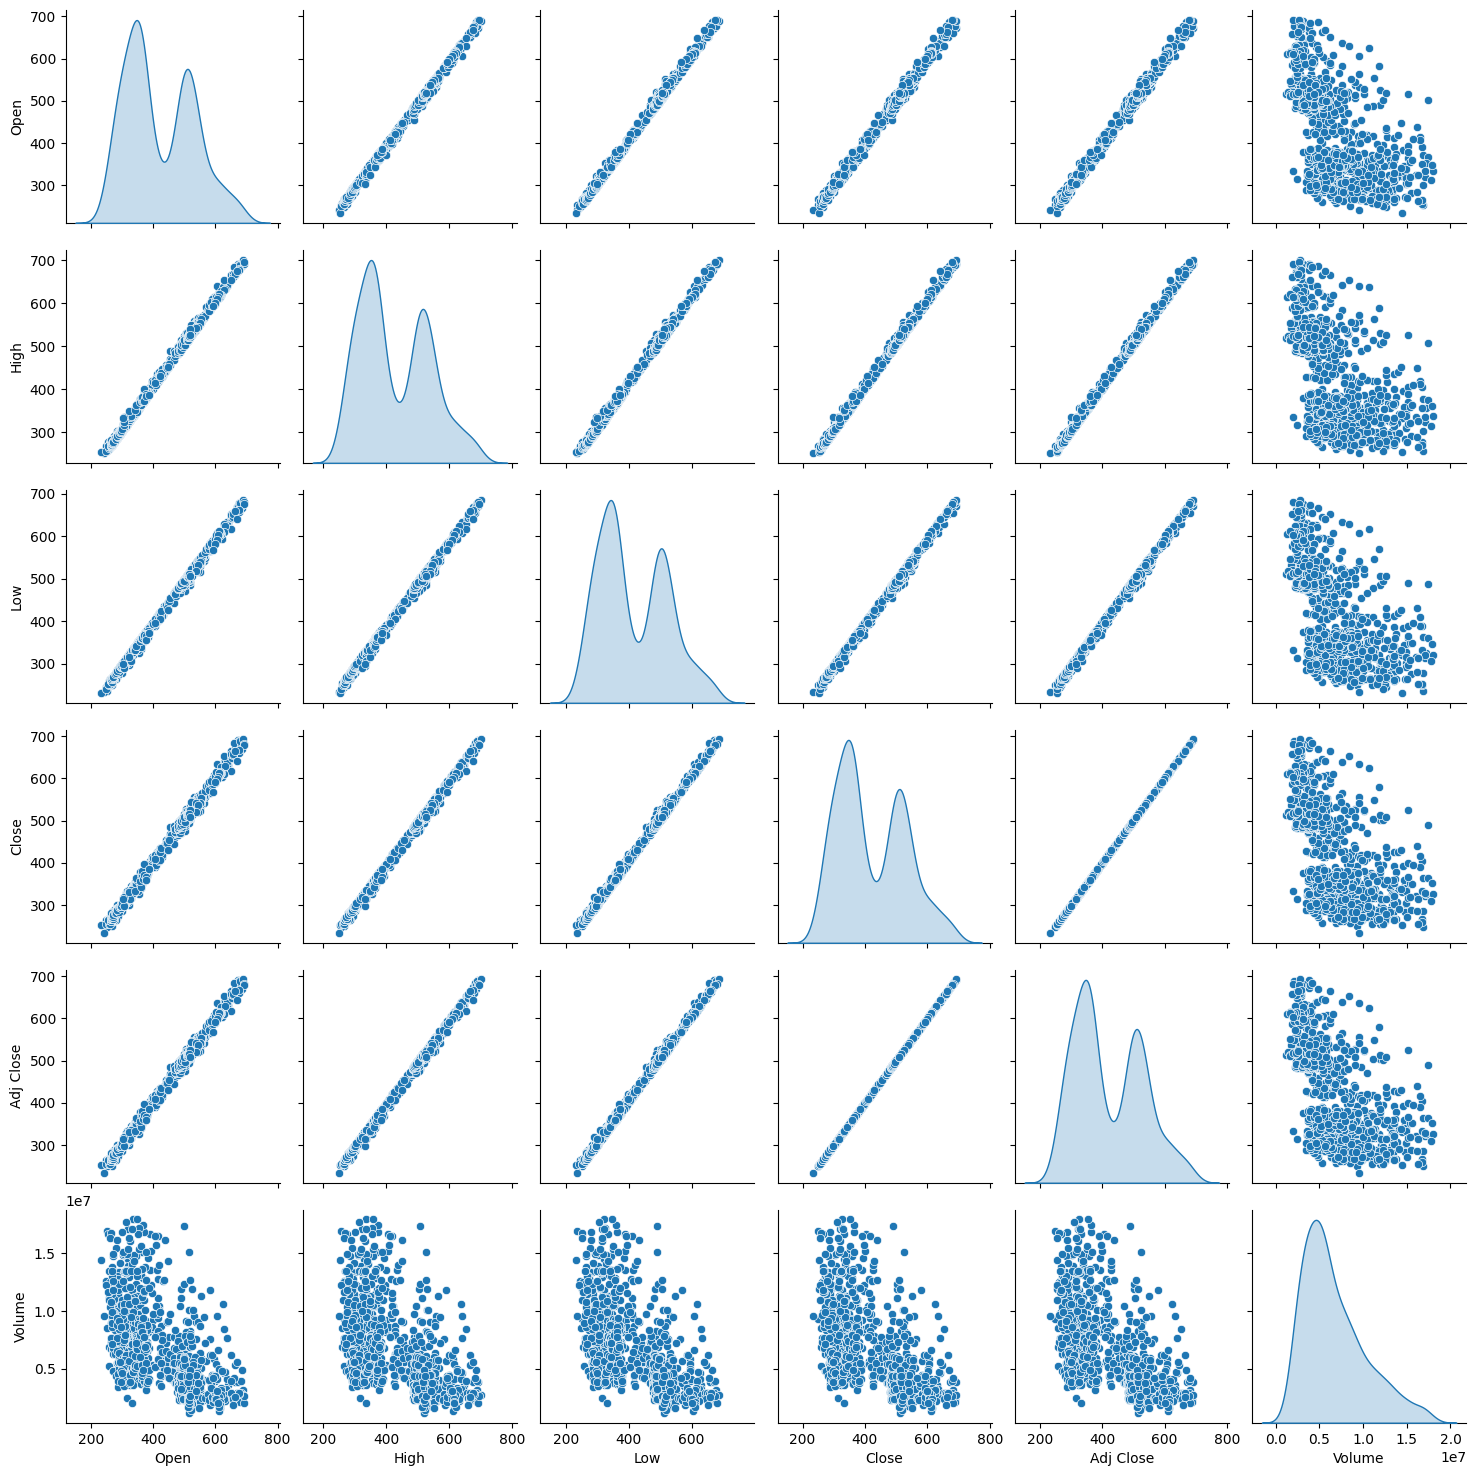

In [38]:
sns.pairplot(data = df[numerical_features], diag_kind='kde')

**1.Strong Positive Correlations:**
- Open, High, Low, Close, and Adj Close columns have very high positive correlations with each other, indicating that they move in the same direction.

**2.Strong Negative Correlation:**
- The Volume column has a moderately strong negative correlation with the Open, High, Low, Close, and Adj Close columns. This suggests that as the stock price increases, the trading volume tends to decrease, and vice versa.

**3.Diagonal Entries:**
- The diagonal entries of the correlation matrix are all equal to 1, which is expected since they represent the correlation of each variable with itself.

# $$ Model \ Building $$

#### Identify the Input and output 

In [39]:
outputCol = df['Close']
inputCol = df.drop(['Date','Year','Close'],axis=1)

#### Split the Data into Train and Test

In [40]:
xTrain,xTest,yTrain,yTest = train_test_split(inputCol,outputCol,test_size=0.25,random_state=29)
print(f'X_Train : {xTrain.shape}\nX_test : {xTest.shape}\nY_Train : {yTrain.shape}\nY_Test : {yTest.shape}')

X_Train : (718, 5)
X_test : (240, 5)
Y_Train : (718,)
Y_Test : (240,)


#### Creating a pipeLine to optimal Workflow

In [41]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

#### Fit and Evaluate the model

In [42]:
pipeline.fit(xTrain, yTrain)

# Evaluate on training data
train_score = pipeline.score(xTrain, yTrain)
print(f"Train Score: {train_score:.4f}")


# Evaluate on testing data
yScore = pipeline.score(xTest, yTest)
yPreds = pipeline.predict(xTest)
test_mse = mean_squared_error(yTest, yPreds)
print(f"Test Score: {yScore:.4f}")
print(f"Test MSE: {test_mse:.4f}")


Train Score: 1.0000
Test Score: 1.0000
Test MSE: 0.0000


# $$ Stock \ Price \ Prediction \ By \ Deep \  Learning \ RNN, LSTM $$

### Performing LSTM-based Time Series Forecasting with Multi-step Ahead Prediction

In [43]:
data = df[['Date','Open']]

In [44]:
def prepare_data_multi(data, seq_len, out_col=None, multi_step=1):
    x,y = [],[]
    for i in range(data.shape[0]):
        stop_idx = i+seq_len
        stop_end_idx = stop_idx+multi_step
        if stop_end_idx > data.shape[0]:
            break
        if out_col is None:
            x_inp, y_out = data.iloc[i:stop_idx], data.iloc[stop_idx:stop_end_idx]
        else:
            x_inp, y_out = data.iloc[i:stop_idx], data[out_col].iloc[stop_idx:stop_end_idx]
        x.append(x_inp)
        y.append(y_out)
    if multi_step==1:
        return np.array(x), np.squeeze(np.array(y))
    return np.array(x), np.array(y)

In [45]:
open_mean = data['Open'].mean()
std_mean = data['Open'].std()

In [47]:
data['Open_z'] = (data.loc[:,'Open']-open_mean)/std_mean

In [50]:
train_endidx = np.around(data.shape[0]*0.8).astype(int)
train_endidx

766

In [113]:
X, Y = prepare_data_multi(data['Open_z'], 50)

In [114]:
n_features = 1
X = X.reshape(X.shape[0], X.shape[1], n_features)
x_train, x_test = X[:train_endidx], X[train_endidx:]
y_train, y_test = Y[:train_endidx], Y[train_endidx:]

In [115]:
x_train.shape,y_train.shape

((766, 50, 1), (766,))

In [116]:
n_steps = 50

In [117]:
cb_early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

In [118]:
model = Sequential()
model.add(LSTM(60, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_train, y_train,validation_data=[x_test, y_test], epochs=200, verbose=1, callbacks=[cb_early_stop])

Epoch 1/200
24/24 [==============================] - 4s 65ms/step - loss: 0.2806 - val_loss: 78307.1094
Epoch 2/200
24/24 [==============================] - 1s 41ms/step - loss: 0.0712 - val_loss: 57.2144
Epoch 3/200
24/24 [==============================] - 1s 48ms/step - loss: 0.0533 - val_loss: 1.5720
Epoch 4/200
24/24 [==============================] - 1s 46ms/step - loss: 0.0540 - val_loss: 1.4453
Epoch 5/200
24/24 [==============================] - 1s 46ms/step - loss: 0.0449 - val_loss: 0.3394
Epoch 6/200
24/24 [==============================] - 1s 47ms/step - loss: 0.0436 - val_loss: 0.1155
Epoch 7/200
24/24 [==============================] - 1s 48ms/step - loss: 0.0416 - val_loss: 0.1503
Epoch 8/200
24/24 [==============================] - 1s 45ms/step - loss: 0.0419 - val_loss: 0.0929
Epoch 9/200
24/24 [==============================] - 1s 43ms/step - loss: 0.0379 - val_loss: 0.0871
Epoch 10/200
24/24 [==============================] - 1s 43ms/step - loss: 0.0368 - val_loss: 0

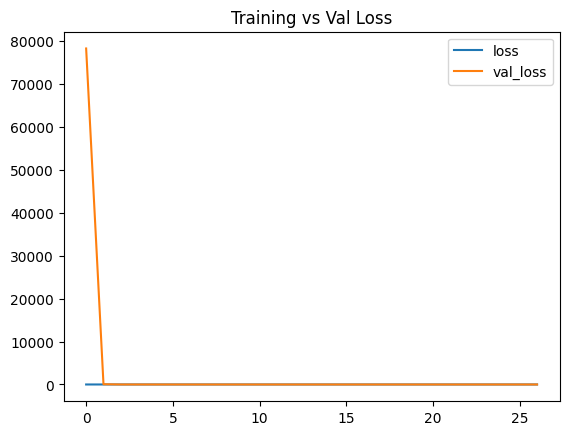

In [119]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Training vs Val Loss")
plt.legend()
plt.show()

In [120]:
# Prediction
y_pred = model.predict(x_test, verbose=1)

5/5 [==============================] - 0s 14ms/step


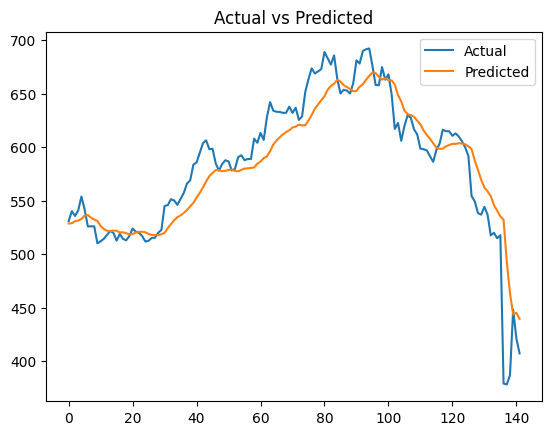

In [121]:
plt.plot((y_test*std_mean)+open_mean, label='Actual')
plt.plot((y_pred*std_mean)+open_mean, label='Predicted')
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

## Stacked LSTMS

In [122]:

# return_sequences=True if next layer is also RNN Layer
model_stacked = Sequential()
model_stacked.add(LSTM(60, activation='relu', input_shape=(n_steps, n_features), return_sequences=True))
model_stacked.add(Dropout(0.3))
model_stacked.add(LSTM(30, activation='relu'))
model_stacked.add(Dropout(0.3))
model_stacked.add(Dense(1))
model_stacked.compile(optimizer='adam', loss='mse')
history = model_stacked.fit(x_train, y_train,validation_data=[x_test, y_test], epochs=200, verbose=1, callbacks=[cb_early_stop])

Epoch 1/200
24/24 [==============================] - 10s 130ms/step - loss: 0.3504 - val_loss: 168147584.0000
Epoch 2/200
24/24 [==============================] - 2s 82ms/step - loss: 0.1545 - val_loss: 0.6484
Epoch 3/200
24/24 [==============================] - 2s 92ms/step - loss: 0.1091 - val_loss: 1822153.3750
Epoch 4/200
24/24 [==============================] - 2s 83ms/step - loss: 0.0777 - val_loss: 632.9265
Epoch 5/200
24/24 [==============================] - 2s 90ms/step - loss: 0.0667 - val_loss: 104.0046
Epoch 6/200
24/24 [==============================] - 2s 83ms/step - loss: 0.0619 - val_loss: 13.6996
Epoch 7/200
24/24 [==============================] - 2s 84ms/step - loss: 0.0674 - val_loss: 0.9209
Epoch 8/200
24/24 [==============================] - 2s 84ms/step - loss: 0.0685 - val_loss: 2.8067
Epoch 9/200
24/24 [==============================] - 2s 86ms/step - loss: 0.0631 - val_loss: 0.8919
Epoch 10/200
24/24 [==============================] - 2s 89ms/step - loss: 0.05

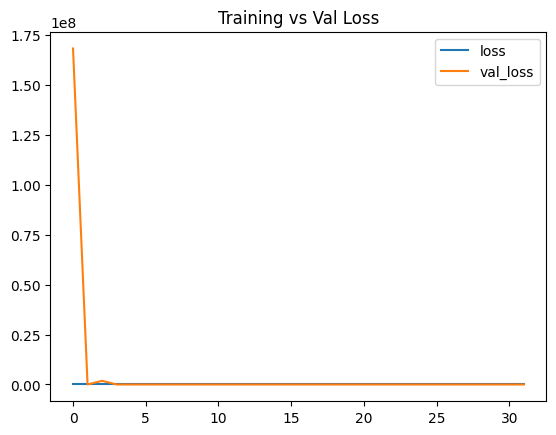

In [123]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Training vs Val Loss")
plt.legend()
plt.show()

In [124]:
# Prediction
y_pred = model_stacked.predict(x_test, verbose=1)

5/5 [==============================] - 1s 28ms/step


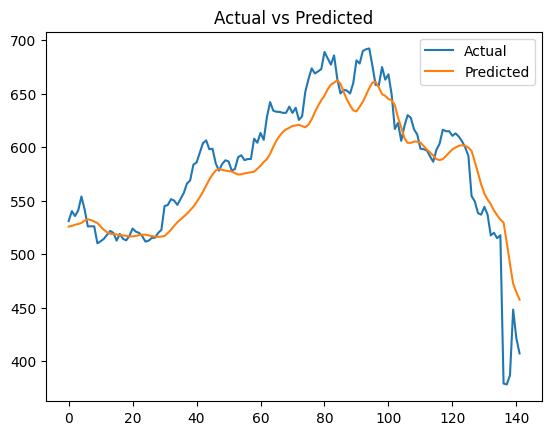

In [125]:
plt.plot((y_test*std_mean)+open_mean, label='Actual')
plt.plot((y_pred*std_mean)+open_mean, label='Predicted')
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

## Bidirectional LSTM
- Note: just for Experiment purpose, Bi Directional LSTM can be used only in Offline mode in reality we don't use for stock market data

In [126]:

# Note: just for tutorial purpose, Bi Directional LSTM can be used only in Offline mode
# in reality we don't use for stock market data
model_stacked_bd = Sequential()
model_stacked_bd.add(Bidirectional(LSTM(60, activation='relu', input_shape=(n_steps, n_features), return_sequences=True)))
model_stacked_bd.add(Dropout(0.3))
model_stacked_bd.add(LSTM(30, activation='relu'))
model_stacked_bd.add(Dropout(0.3))
model_stacked_bd.add(Dense(1))
model_stacked_bd.compile(optimizer='adam', loss='mse')
history = model_stacked_bd.fit(x_train, y_train,validation_data=[x_test, y_test], epochs=200, verbose=1, callbacks=[cb_early_stop])

Epoch 1/200
24/24 [==============================] - 13s 138ms/step - loss: 0.2927 - val_loss: 1740.3934
Epoch 2/200
24/24 [==============================] - 2s 90ms/step - loss: 0.0705 - val_loss: 0.1041
Epoch 3/200
24/24 [==============================] - 2s 95ms/step - loss: 0.0606 - val_loss: 0.0902
Epoch 4/200
24/24 [==============================] - 2s 77ms/step - loss: 0.0533 - val_loss: 0.0933
Epoch 5/200
24/24 [==============================] - 2s 86ms/step - loss: 0.0533 - val_loss: 0.1144
Epoch 6/200
24/24 [==============================] - 2s 79ms/step - loss: 0.0468 - val_loss: 0.0779
Epoch 7/200
24/24 [==============================] - 2s 89ms/step - loss: 0.0474 - val_loss: 0.0927
Epoch 8/200
24/24 [==============================] - 2s 79ms/step - loss: 0.0457 - val_loss: 0.1419
Epoch 9/200
24/24 [==============================] - 2s 86ms/step - loss: 0.0485 - val_loss: 0.0913
Epoch 10/200
24/24 [==============================] - 2s 78ms/step - loss: 0.0473 - val_loss: 0

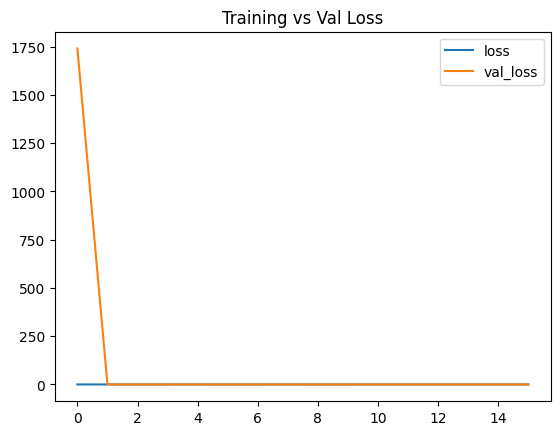

In [127]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Training vs Val Loss")
plt.legend()
plt.show()

In [128]:
y_pred = model_stacked_bd.predict(x_test, verbose=1)

5/5 [==============================] - 1s 24ms/step


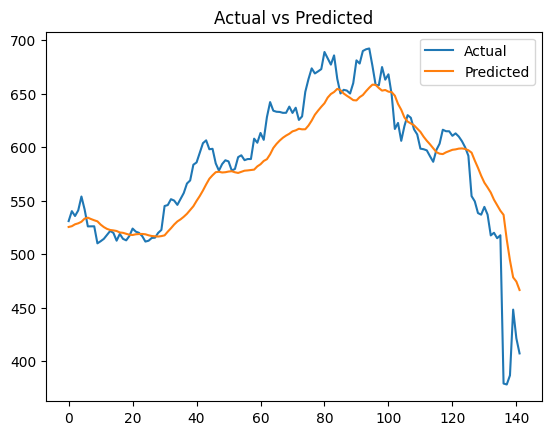

In [129]:
plt.plot((y_test*std_mean)+open_mean, label='Actual')
plt.plot((y_pred*std_mean)+open_mean, label='Predicted')
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

## Multi Variate LSTM

In [130]:

from sklearn.preprocessing import MinMaxScaler
from sklearn import set_config

In [131]:
set_config(transform_output='pandas')

In [150]:
multi_cols = ['Open', 'High','Low','Volume','Close']
mx = MinMaxScaler()
data = mx.fit_transform(df[multi_cols])
multi_x, multi_y = prepare_data_multi(data[multi_cols],50, 'Close')
multi_x_train, multi_x_test = multi_x[:train_endidx], multi_x[train_endidx:]
multi_y_train, multi_y_test = multi_y[:train_endidx], multi_y[train_endidx:]

In [151]:
multi_model = Sequential()
multi_model.add(LSTM(60, activation='relu', input_shape=(multi_x_train.shape[1], multi_x_train.shape[2])))
multi_model.add(Dropout(0.3))
multi_model.add(Dense(1))
multi_model.compile(optimizer='adam', loss='mse')
history = multi_model.fit(multi_x_train, multi_y_train,validation_data=[multi_x_test, multi_y_test], epochs=200, verbose=1, callbacks=[cb_early_stop])

Epoch 1/200
24/24 [==============================] - 4s 68ms/step - loss: 0.0983 - val_loss: 0.0351
Epoch 2/200
24/24 [==============================] - 1s 46ms/step - loss: 0.0114 - val_loss: 0.0139
Epoch 3/200
24/24 [==============================] - 1s 46ms/step - loss: 0.0078 - val_loss: 0.0070
Epoch 4/200
24/24 [==============================] - 1s 46ms/step - loss: 0.0086 - val_loss: 0.0078
Epoch 5/200
24/24 [==============================] - 1s 48ms/step - loss: 0.0064 - val_loss: 0.0060
Epoch 6/200
24/24 [==============================] - 1s 48ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 7/200
24/24 [==============================] - 1s 47ms/step - loss: 0.0064 - val_loss: 0.0054
Epoch 8/200
24/24 [==============================] - 1s 48ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 9/200
24/24 [==============================] - 1s 47ms/step - loss: 0.0063 - val_loss: 0.0047
Epoch 10/200
24/24 [==============================] - 1s 48ms/step - loss: 0.0053 - val_loss: 0.0047

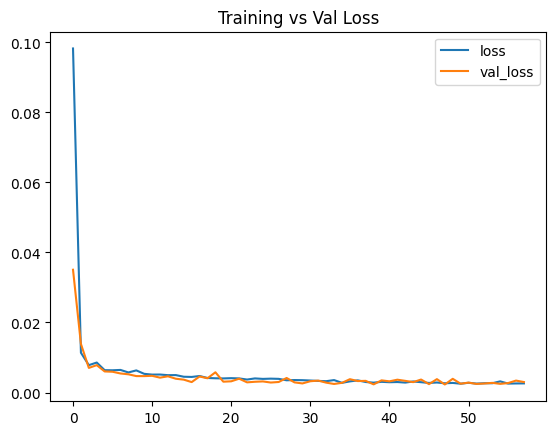

In [152]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Training vs Val Loss")
plt.legend()
plt.show()

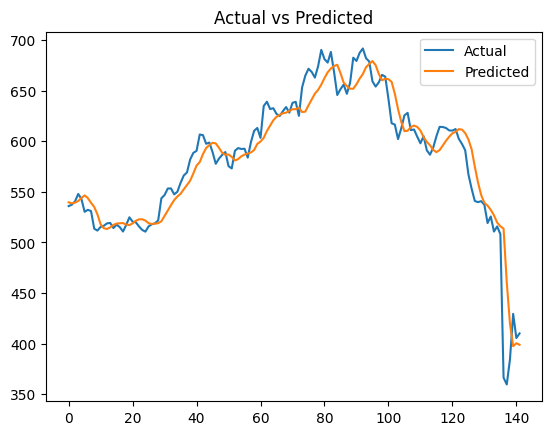

In [153]:
max_min = df['Close'].max()-df['Close'].min()
min_v = df['Close'].min()
y_pred = multi_model.predict(multi_x_test, verbose=0)
plt.plot(multi_y_test*max_min+min_v, label='Actual')
plt.plot(y_pred*max_min+min_v, label='Predicted')
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

## Multiple Output LSTM


In [154]:
## Multi Output LSTM
multiplt_x, multiplt_y = prepare_data_multi(data[multi_cols],50)
multi_x_train, multi_x_test = multiplt_x[:train_endidx], multiplt_x[train_endidx:]
multi_y_train, multi_y_test = multiplt_y[:train_endidx], multiplt_y[train_endidx:]

In [155]:
multi_out_model = Sequential()
multi_out_model.add(LSTM(100, activation='relu', input_shape=(multi_x_train.shape[1], multi_x_train.shape[2]), return_sequences=True))
multi_out_model.add(Dropout(0.3))
multi_out_model.add(LSTM(70, activation='relu'))
multi_out_model.add(Dropout(0.3))
multi_out_model.add(Dense(multi_y_train.shape[1]))
multi_out_model.compile(optimizer='adam', loss='mse')
history = multi_out_model.fit(multi_x_train, multi_y_train,validation_data=[multi_x_test, multi_y_test], epochs=200, verbose=1, callbacks=[cb_early_stop])

Epoch 1/200
24/24 [==============================] - 10s 183ms/step - loss: 0.0598 - val_loss: 0.0288
Epoch 2/200
24/24 [==============================] - 3s 145ms/step - loss: 0.0192 - val_loss: 0.0252
Epoch 3/200
24/24 [==============================] - 3s 144ms/step - loss: 0.0154 - val_loss: 0.0137
Epoch 4/200
24/24 [==============================] - 3s 143ms/step - loss: 0.0137 - val_loss: 0.0113
Epoch 5/200
24/24 [==============================] - 3s 139ms/step - loss: 0.0124 - val_loss: 0.0124
Epoch 6/200
24/24 [==============================] - 3s 142ms/step - loss: 0.0126 - val_loss: 0.0105
Epoch 7/200
24/24 [==============================] - 3s 136ms/step - loss: 0.0114 - val_loss: 0.0098
Epoch 8/200
24/24 [==============================] - 3s 136ms/step - loss: 0.0111 - val_loss: 0.0099
Epoch 9/200
24/24 [==============================] - 3s 131ms/step - loss: 0.0105 - val_loss: 0.0096
Epoch 10/200
24/24 [==============================] - 3s 132ms/step - loss: 0.0109 - val_l

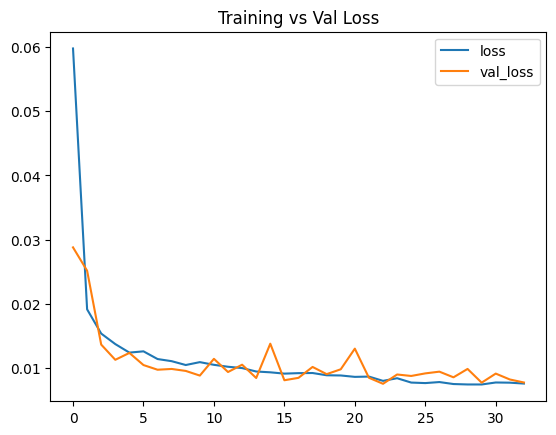

In [156]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Training vs Val Loss")
plt.legend()
plt.show()

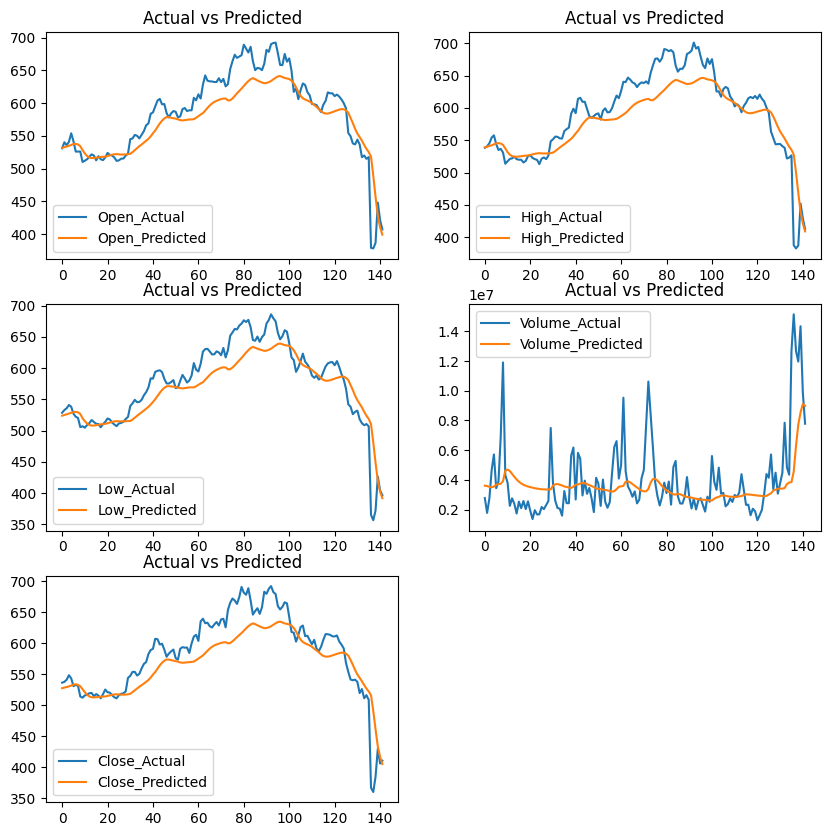

In [157]:
plt.figure(figsize=(10,10))
y_pred = multi_out_model.predict(multi_x_test, verbose=0)
y_pred_tr = mx.inverse_transform(y_pred)
y_true = mx.inverse_transform(multi_y_test)
for i,col in enumerate(multi_cols):
    plt.subplot(3,2,i+1)
    plt.plot(y_true[:,i], label=col+'_Actual')
    plt.plot(y_pred_tr[:,i], label=col+'_Predicted')
    plt.legend()
    plt.title("Actual vs Predicted")
plt.show()

In [158]:
multi_out_stacked = Sequential()
multi_out_stacked.add(LSTM(60, activation='relu', return_sequences=True, input_shape=(multi_x_train.shape[1], multi_x_train.shape[2])))
multi_out_stacked.add(Dropout(0.3))
multi_out_stacked.add(LSTM(40, activation='relu'))
multi_out_stacked.add(Dropout(0.3))
multi_out_stacked.add(Dense(multi_y_train.shape[1]))
multi_out_stacked.compile(optimizer='adam', loss='mse')
history = multi_out_stacked.fit(multi_x_train, multi_y_train,validation_data=[multi_x_test, multi_y_test], epochs=200, verbose=1, callbacks=[cb_early_stop])

Epoch 1/200
24/24 [==============================] - 9s 126ms/step - loss: 0.1005 - val_loss: 0.0709
Epoch 2/200
24/24 [==============================] - 2s 84ms/step - loss: 0.0358 - val_loss: 0.0948
Epoch 3/200
24/24 [==============================] - 2s 84ms/step - loss: 0.0228 - val_loss: 0.0183
Epoch 4/200
24/24 [==============================] - 2s 85ms/step - loss: 0.0204 - val_loss: 0.0151
Epoch 5/200
24/24 [==============================] - 2s 88ms/step - loss: 0.0187 - val_loss: 0.0139
Epoch 6/200
24/24 [==============================] - 2s 89ms/step - loss: 0.0171 - val_loss: 0.0138
Epoch 7/200
24/24 [==============================] - 2s 88ms/step - loss: 0.0165 - val_loss: 0.0122
Epoch 8/200
24/24 [==============================] - 2s 88ms/step - loss: 0.0152 - val_loss: 0.0128
Epoch 9/200
24/24 [==============================] - 2s 89ms/step - loss: 0.0152 - val_loss: 0.0148
Epoch 10/200
24/24 [==============================] - 2s 89ms/step - loss: 0.0143 - val_loss: 0.011

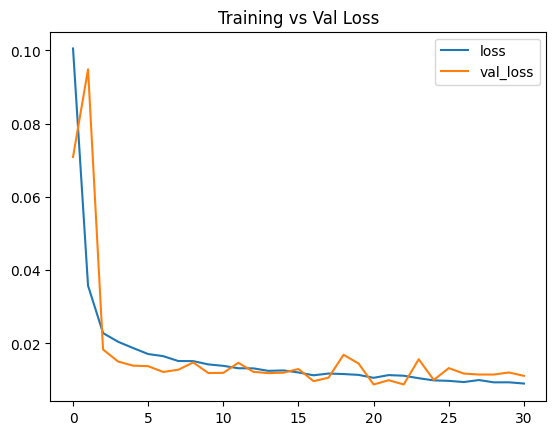

In [159]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Training vs Val Loss")
plt.legend()
plt.show()

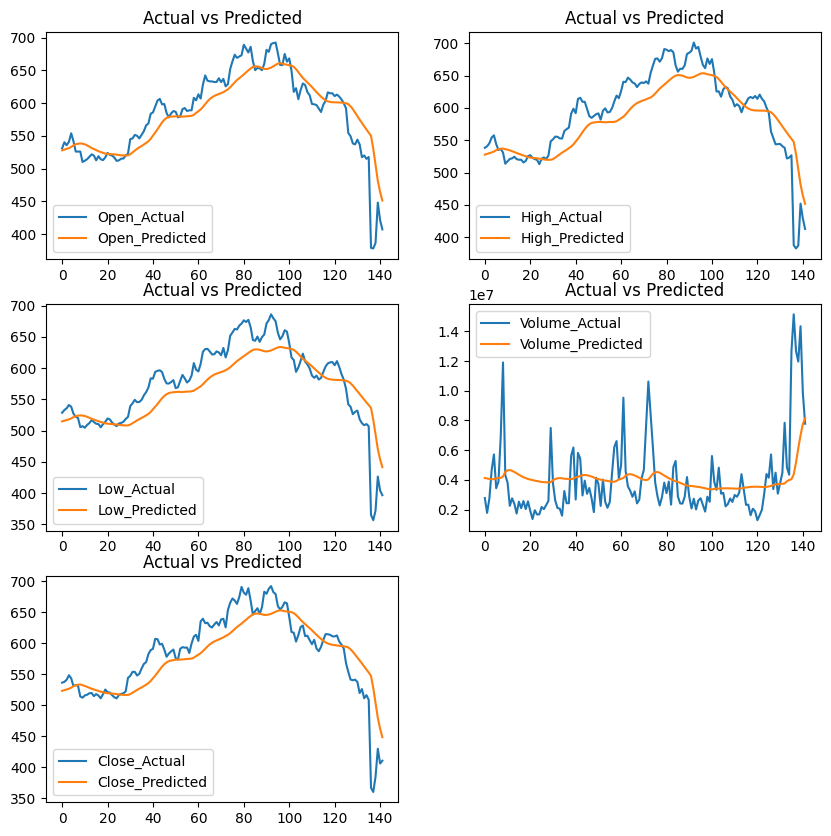

In [160]:
plt.figure(figsize=(10,10))
y_pred = multi_out_stacked.predict(multi_x_test, verbose=0)
y_pred_tr = mx.inverse_transform(y_pred)
y_true = mx.inverse_transform(multi_y_test)
for i,col in enumerate(multi_cols):
    plt.subplot(3,2,i+1)
    plt.plot(y_true[:,i], label=col+'_Actual')
    plt.plot(y_pred_tr[:,i], label=col+'_Predicted')
    plt.legend()
    plt.title("Actual vs Predicted")
plt.show()